In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("final_output.csv")
df.head()

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
0,146,216693.256255,AL,Autauga,HWAV,87.082405,TRND,73.846643,HRCN,67.653656,...,53079.0,0.707117,0.193045,0.014846,0.036000,28.131469,531.0,8.1,1.9,96.260178
1,198,339110.537918,AL,Baldwin,LTNG,99.388674,HRCN,98.878421,WFIR,92.650334,...,60969.0,0.804666,0.077669,0.008754,0.054736,32.450286,796.0,10.9,2.0,112.985603
2,122,173013.008360,AL,Barbour,LTNG,82.303732,DRGT,80.687241,HRCN,77.164648,...,41531.0,0.439519,0.469809,0.004084,0.059866,11.153098,398.0,17.8,4.0,27.538003
3,129,201356.450724,AL,Bibb,TRND,71.969456,HWAV,67.228762,ERQK,61.692650,...,39835.0,0.737541,0.196923,0.001166,0.033194,11.913807,286.0,8.7,2.0,35.161208
4,137,220333.454690,AL,Blount,TRND,89.723194,LTNG,84.073359,HWAV,82.437162,...,45021.0,0.841546,0.013968,0.002942,0.097592,14.903610,464.0,11.5,1.8,89.763100


In [34]:
df.columns

Index(['price_sq', 'price', 'state', 'county', 'Risk_1_Type', 'Risk_1_Score',
       'Risk_2_Type', 'Risk_2_Score', 'Risk_3_Type', 'Risk_3_Score',
       'risk_score', 'risk_ratng', 'income', 'white_pct', 'black_pct',
       'asian_pct', 'hispanic_pct', 'ed_pct', 'tax_paid_2022', 'tax_trend',
       'unemp_rate', 'pop_density'],
      dtype='object')

In [35]:
eda_df = df.drop(columns="risk_ratng")
eda_df.head()

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
0,146,216693.256255,AL,Autauga,HWAV,87.082405,TRND,73.846643,HRCN,67.653656,...,53079.0,0.707117,0.193045,0.014846,0.036000,28.131469,531.0,8.1,1.9,96.260178
1,198,339110.537918,AL,Baldwin,LTNG,99.388674,HRCN,98.878421,WFIR,92.650334,...,60969.0,0.804666,0.077669,0.008754,0.054736,32.450286,796.0,10.9,2.0,112.985603
2,122,173013.008360,AL,Barbour,LTNG,82.303732,DRGT,80.687241,HRCN,77.164648,...,41531.0,0.439519,0.469809,0.004084,0.059866,11.153098,398.0,17.8,4.0,27.538003
3,129,201356.450724,AL,Bibb,TRND,71.969456,HWAV,67.228762,ERQK,61.692650,...,39835.0,0.737541,0.196923,0.001166,0.033194,11.913807,286.0,8.7,2.0,35.161208
4,137,220333.454690,AL,Blount,TRND,89.723194,LTNG,84.073359,HWAV,82.437162,...,45021.0,0.841546,0.013968,0.002942,0.097592,14.903610,464.0,11.5,1.8,89.763100


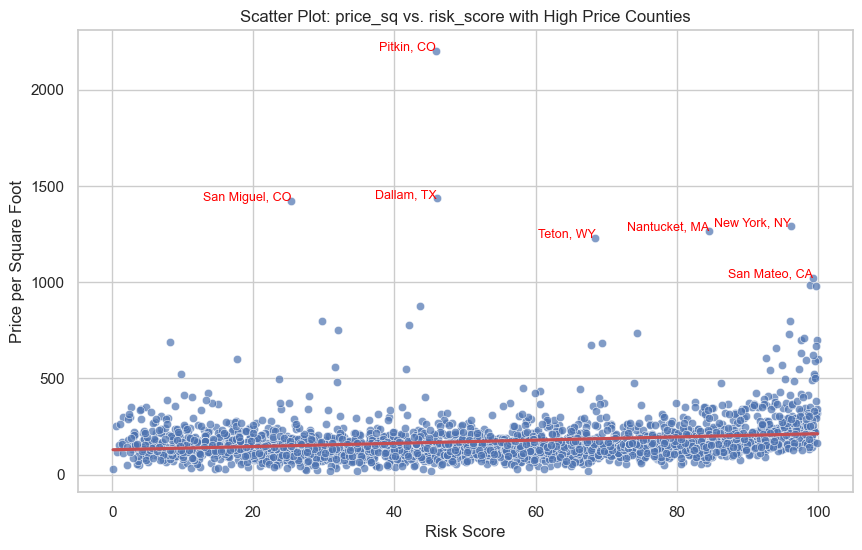

In [42]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x="risk_score", y="price_sq", data=eda_df, alpha=0.7, color="b")

# Regression line
sns.regplot(x="risk_score", y="price_sq", data=eda_df, scatter=False, color="r")

# Annotate high price points
high_price_points = eda_df[eda_df["price_sq"] > 1000]

for _, row in high_price_points.iterrows():
    plt.text(
        row["risk_score"],
        row["price_sq"],
        f"{row['county']}, {row['state']}",
        fontsize=9,
        color="red",
        ha="right",
    )

# Plot title and labels
plt.title("Scatter Plot: price_sq vs. risk_score with High Price Counties")
plt.xlabel("Risk Score")
plt.ylabel("Price per Square Foot")
plt.show()

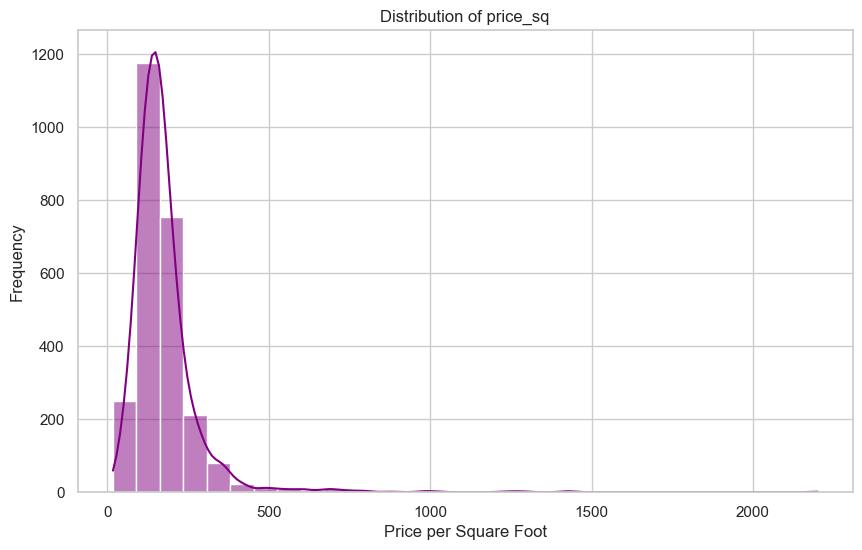

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(eda_df["price_sq"], kde=True, color="purple", bins=30)
plt.title("Distribution of price_sq")
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.show()

In [59]:
eda_df.columns

Index(['price_sq', 'price', 'state', 'county', 'Risk_1_Type', 'Risk_1_Score',
       'Risk_2_Type', 'Risk_2_Score', 'Risk_3_Type', 'Risk_3_Score',
       'risk_score', 'income', 'white_pct', 'black_pct', 'asian_pct',
       'hispanic_pct', 'ed_pct', 'tax_paid_2022', 'tax_trend', 'unemp_rate',
       'pop_density', 'income_per_capita'],
      dtype='object')

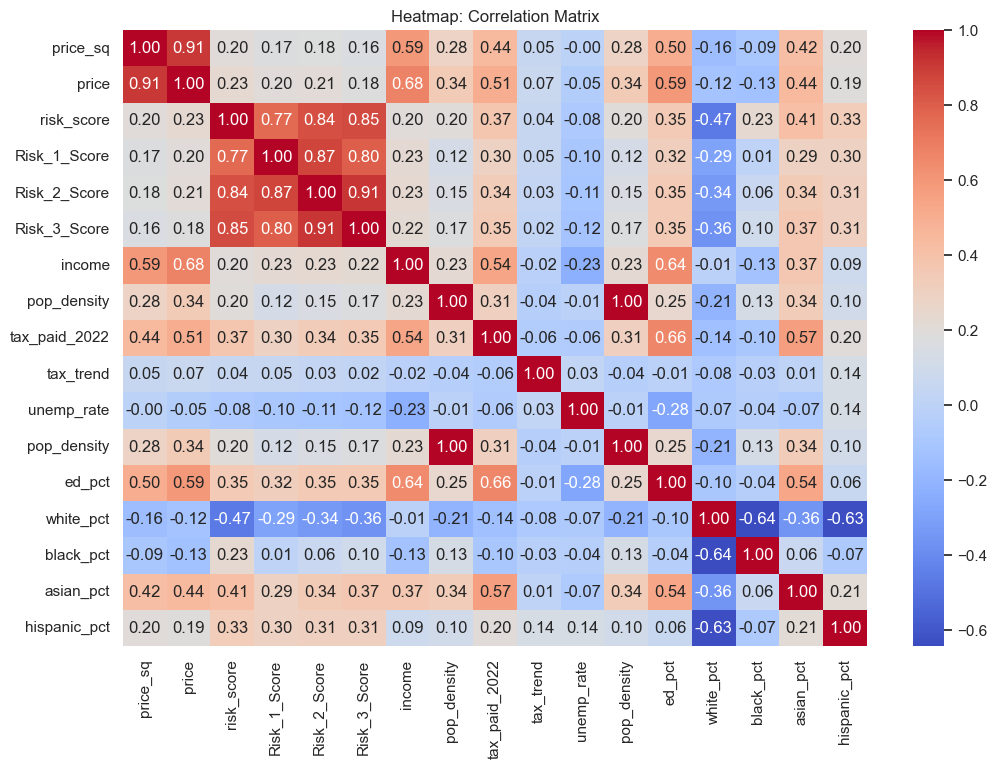

In [60]:
plt.figure(figsize=(12, 8))
corr = eda_df[
    [
        "price_sq",
        "price",
        "risk_score",
        "Risk_1_Score",
        "Risk_2_Score",
        "Risk_3_Score",
        "income",
        "pop_density",
        "tax_paid_2022",
        "tax_trend",
        "unemp_rate",
        "pop_density",
        "ed_pct",
        "white_pct",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
    ]
].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap: Correlation Matrix")
plt.show()

C:\Users\xiaoz\AppData\Local\Temp\ipykernel_37404\1819779309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk_1_Type', y='price_sq', data=avg_price_by_risk, palette='Blues_d')


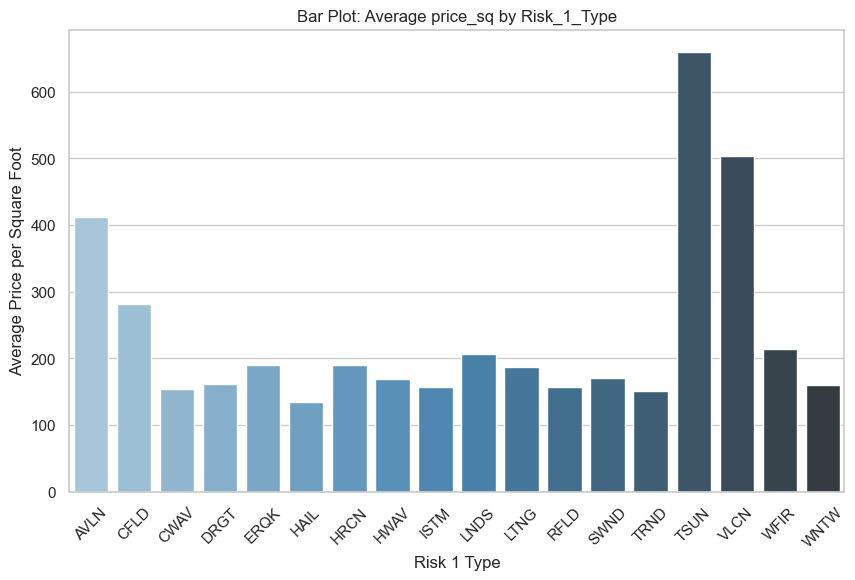

In [45]:
plt.figure(figsize=(10, 6))
avg_price_by_risk = eda_df.groupby("Risk_1_Type")["price_sq"].mean().reset_index()
sns.barplot(x="Risk_1_Type", y="price_sq", data=avg_price_by_risk, palette="Blues_d")
plt.title("Bar Plot: Average price_sq by Risk_1_Type")
plt.xlabel("Risk 1 Type")
plt.ylabel("Average Price per Square Foot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [47]:
filtered_df = eda_df[
    (eda_df["Risk_1_Type"] == "TSUN") | (eda_df["Risk_1_Type"] == "VLCN")
]

filtered_df

,price_sq,price,state,county,Risk_1_Type,Risk_1_Score,Risk_2_Type,Risk_2_Score,Risk_3_Type,Risk_3_Score,...,income,white_pct,black_pct,asian_pct,hispanic_pct,ed_pct,tax_paid_2022,tax_trend,unemp_rate,pop_density
443,660,940259.697540,HI,Honolulu,TSUN,100.0,WFIR,98.981864,ERQK,97.550111,...,69893.0,0.172679,0.019042,0.422436,0.090823,36.226286,2368.0,7.4,2.7,463.243996
2379,503,793847.386066,WA,King,VLCN,100.0,ERQK,99.809100,LNDS,97.044651,...,122235.0,0.542187,0.065133,0.198147,0.107073,54.026467,6476.0,10.2,3.1,973.154632


In [49]:
filtered_df = eda_df[~eda_df["Risk_1_Type"].isin(["TSUN", "VLCN"])]

risk_type_counts = filtered_df["Risk_1_Type"].value_counts()

risk_type_counts

Risk_1_Type
LNDS    263
HAIL    255
DRGT    237
ISTM    226
CWAV    217
WFIR    193
SWND    189
HRCN    182
ERQK    168
RFLD    154
WNTW    129
HWAV    115
LTNG     99
TRND     84
CFLD     14
AVLN     12
Name: count, dtype: int64

**OLS Regression**

* Check multicollinearity for risk scores

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

risk_features = ["risk_score", "Risk_1_Score", "Risk_2_Score", "Risk_3_Score"]

correlation_matrix = eda_df[risk_features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

X = sm.add_constant(eda_df[risk_features])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)

Correlation Matrix:
              risk_score  Risk_1_Score  Risk_2_Score  Risk_3_Score
risk_score      1.000000      0.765404      0.840195      0.852879
Risk_1_Score    0.765404      1.000000      0.874886      0.795666
Risk_2_Score    0.840195      0.874886      1.000000      0.914091
Risk_3_Score    0.852879      0.795666      0.914091      1.000000

Variance Inflation Factor (VIF):
        Feature         VIF
0         const  202.019388
1    risk_score    4.068484
2  Risk_1_Score    4.342676
3  Risk_2_Score    9.759303
4  Risk_3_Score    7.181967


* Check multicollinearity for demographic pct

In [64]:
racial_features = ["white_pct", "black_pct", "asian_pct", "hispanic_pct"]

correlation_matrix_racial = eda_df[racial_features].corr()
print("Correlation Matrix:")
print(correlation_matrix_racial)

X_racial = sm.add_constant(eda_df[racial_features])
vif_data_racial = pd.DataFrame()
vif_data_racial["Feature"] = X_racial.columns
vif_data_racial["VIF"] = [
    variance_inflation_factor(X_racial.values, i) for i in range(X_racial.shape[1])
]

print("\nVariance Inflation Factor (VIF):")
print(vif_data_racial)

Correlation Matrix:
              white_pct  black_pct  asian_pct  hispanic_pct
white_pct      1.000000  -0.641890  -0.357761     -0.634626
black_pct     -0.641890   1.000000   0.058992     -0.073672
asian_pct     -0.357761   0.058992   1.000000      0.212531
hispanic_pct  -0.634626  -0.073672   0.212531      1.000000

Variance Inflation Factor (VIF):
        Feature        VIF
0         const   1.000000
1     white_pct  11.166194
2     black_pct   6.157424
3     asian_pct   1.416692
4  hispanic_pct   5.719834


* PCA

In [61]:
risk_scores = eda_df[["Risk_1_Score", "Risk_2_Score", "Risk_3_Score"]]

pca = PCA(n_components=1)
eda_df["pca_risk_score"] = pca.fit_transform(risk_scores)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.91722602]


In [63]:
risk_features_with_pca = ["pca_risk_score", "risk_score"]

correlation_matrix_pca = eda_df[risk_features_with_pca].corr()
print("Correlation Matrix:")
print(correlation_matrix_pca)

X_pca = sm.add_constant(eda_df[risk_features_with_pca])
vif_data_pca = pd.DataFrame()
vif_data_pca["Feature"] = X_pca.columns
vif_data_pca["VIF"] = [
    variance_inflation_factor(X_pca.values, i) for i in range(X_pca.shape[1])
]

print("\nVariance Inflation Factor (VIF):")
print(vif_data_pca)

Correlation Matrix:
                pca_risk_score  risk_score
pca_risk_score        1.000000    0.866865
risk_score            0.866865    1.000000

Variance Inflation Factor (VIF):
          Feature       VIF
0           const  1.000000
1  pca_risk_score  4.023402
2      risk_score  4.023402


In [65]:
import statsmodels.api as sm

X = eda_df[
    [
        "pca_risk_score",
        "income",
        "black_pct",
        "asian_pct",
        "hispanic_pct",
        "ed_pct",
        "tax_paid_2022",
        "tax_trend",
        "unemp_rate",
        "pop_density",
    ]
]
y = eda_df["price_sq"]

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     206.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          2.24e-319
Time:                        17:21:32   Log-Likelihood:                -14850.
No. Observations:                2539   AIC:                         2.972e+04
Df Residuals:                    2528   BIC:                         2.979e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            173.7637      1.669    104.

In [54]:
price_sq_stats = eda_df["price_sq"].describe()
print(price_sq_stats)

count    2539.000000
mean      173.763686
std       113.200110
min        17.000000
25%       119.000000
50%       155.000000
75%       199.000000
max      2200.000000
Name: price_sq, dtype: float64


**Get rid of the extreme values and do the ols again**

                            OLS Regression Results                            
Dep. Variable:               price_sq   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     73.35
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          5.52e-153
Time:                        17:02:45   Log-Likelihood:                -12720.
No. Observations:                2403   AIC:                         2.547e+04
Df Residuals:                    2390   BIC:                         2.554e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               158.4109      1.00

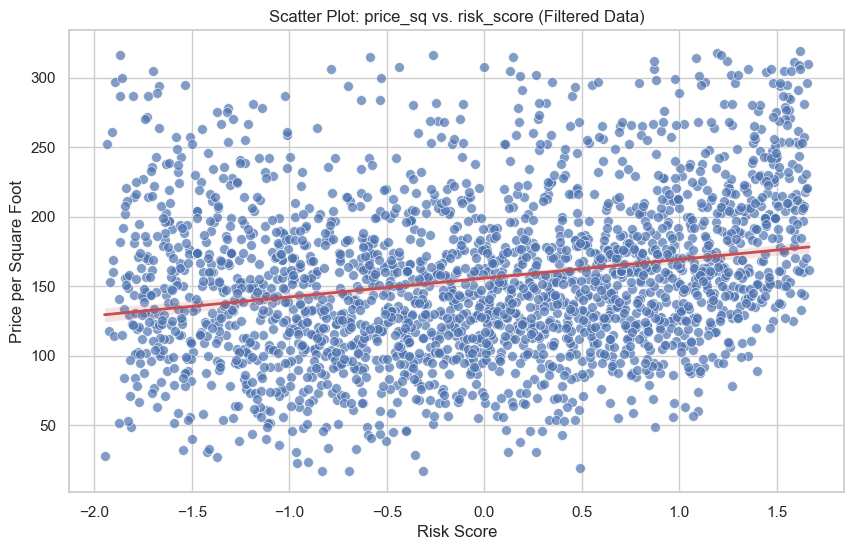

In [57]:
# Handle missing values: Fill missing values with the mean, numeric_only ensures only numeric columns are considered
eda_df.fillna(eda_df.mean(numeric_only=True), inplace=True)

# Feature creation: Create new features, e.g., income per capita
eda_df["income_per_capita"] = eda_df["income"] / eda_df["pop_density"]

# Feature selection: Select relevant features
features = [
    "risk_score",
    "income",
    "white_pct",
    "black_pct",
    "asian_pct",
    "hispanic_pct",
    "ed_pct",
    "tax_paid_2022",
    "tax_trend",
    "unemp_rate",
    "pop_density",
    "income_per_capita",
]

# Data standardization: Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
eda_df[features] = scaler.fit_transform(eda_df[features])

# Detect outliers in price_sq
Q1 = eda_df["price_sq"].quantile(0.25)
Q3 = eda_df["price_sq"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = eda_df[
    (eda_df["price_sq"] >= lower_bound) & (eda_df["price_sq"] <= upper_bound)
]

# Perform OLS regression on the filtered dataset
X_filtered = filtered_df[features]
y_filtered = filtered_df["price_sq"]

# Add a constant (intercept)
X_filtered = sm.add_constant(X_filtered)

# Fit the OLS regression model
model_filtered = sm.OLS(y_filtered, X_filtered).fit()

# Output the regression results
print(model_filtered.summary())

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Scatter plot
sns.scatterplot(
    x="risk_score", y="price_sq", data=filtered_df, alpha=0.7, color="b", s=50
)

# Regression line
sns.regplot(
    x="risk_score",
    y="price_sq",
    data=filtered_df,
    scatter=False,
    color="r",
    line_kws={"linewidth": 2},
)

# Annotate plot
plt.title("Scatter Plot: price_sq vs. risk_score (Filtered Data)")
plt.xlabel("Risk Score")
plt.ylabel("Price per Square Foot")
plt.show()

**GLM**